# **Challenge Telecom X: análisis de evasión de clientes - Parte 2**

#### Este proyecto tiene como objetivo identificar las causas de la evasión de clientes de la empresa Telecom X mediante modelos predictivos que anticipen los clientes susceptibles de evasión, permitiendo a la empresa intervenciones para su retención.

#### Objetivos:
👉 Preparar los datos para el modelado (tratamiento, codificación, normalización).

👉   Realizar análisis de correlación y selección de variables.

👉 Entrenar dos modelos de clasificación.


## 📌 Extracción

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
df = pd.read_csv('datos_tratados.csv')
df.head()

,ID_del_cliente,churn,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,tiempo_en_la_empresa,servicio_de_telefono,multiples_lineas,servicio_de_internet,...,soporte_tecnico,television_streaming,peliculas_streaming,contrato,factura_electronica,metodo_de_pago,cargos_mensuales,cargos_totales,cuentas_diarias,cuartiles
0,0002-ORFBO,0,Mujer,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,"(-0.001, 14.0]"
1,0003-MKNFE,0,Hombre,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,"(-0.001, 14.0]"
2,0004-TLHLJ,1,Hombre,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,"(-0.001, 14.0]"
3,0011-IGKFF,1,Hombre,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,"(-0.001, 14.0]"
4,0013-EXCHZ,1,Mujer,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,"(-0.001, 14.0]"


In [256]:
# Ver las columnas disponibles
df.columns

Index(['ID_del_cliente', 'churn', 'genero', 'ciudadano_senior', 'tiene_pareja',
       'tiene_dependientes', 'tiempo_en_la_empresa', 'servicio_de_telefono',
       'multiples_lineas', 'servicio_de_internet', 'internet.OnlineSecurity',
       'respaldo_on_line', 'proteccion_de_dispositivo', 'soporte_tecnico',
       'television_streaming', 'peliculas_streaming', 'contrato',
       'factura_electronica', 'metodo_de_pago', 'cargos_mensuales',
       'cargos_totales', 'cuentas_diarias', 'cuartiles'],
      dtype='object')

In [257]:
# Renombrar la columna 'internet.OnlineSecurity'
df.rename(columns={'internet.OnlineSecurity':'seguridad_en_linea'}, inplace=True)

In [258]:
# Verificar la estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_del_cliente             7267 non-null   object 
 1   churn                      7267 non-null   int64  
 2   genero                     7267 non-null   object 
 3   ciudadano_senior           7267 non-null   int64  
 4   tiene_pareja               7267 non-null   int64  
 5   tiene_dependientes         7267 non-null   int64  
 6   tiempo_en_la_empresa       7267 non-null   int64  
 7   servicio_de_telefono       7267 non-null   int64  
 8   multiples_lineas           7267 non-null   object 
 9   servicio_de_internet       7267 non-null   object 
 10  seguridad_en_linea         7267 non-null   object 
 11  respaldo_on_line           7267 non-null   object 
 12  proteccion_de_dispositivo  7267 non-null   object 
 13  soporte_tecnico            7267 non-null   objec

## 🛠️ Preparación de los Datos

 ✔️ Remover columnas irrelevantes

In [259]:
# Eliminar de las columnas irrelevantes
df = df.drop(columns=['ID_del_cliente', 'cuartiles'], axis=1)

In [186]:
df_clean = df.copy()

In [187]:
# Agrupar "No internet service" como "0"
cols_to_fix = [
    'seguridad_en_linea', 'respaldo_on_line', 'proteccion_de_dispositivo',
    'soporte_tecnico', 'television_streaming', 'peliculas_streaming'
]

In [188]:
df_clean.columns

Index(['churn', 'genero', 'ciudadano_senior', 'tiene_pareja',
       'tiene_dependientes', 'tiempo_en_la_empresa', 'servicio_de_telefono',
       'multiples_lineas', 'servicio_de_internet', 'seguridad_en_linea',
       'respaldo_on_line', 'proteccion_de_dispositivo', 'soporte_tecnico',
       'television_streaming', 'peliculas_streaming', 'contrato',
       'factura_electronica', 'metodo_de_pago', 'cargos_mensuales',
       'cargos_totales', 'cuentas_diarias'],
      dtype='object')

In [189]:
for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', '0')

In [190]:
df_clean.head()

,churn,genero,ciudadano_senior,tiene_pareja,tiene_dependientes,tiempo_en_la_empresa,servicio_de_telefono,multiples_lineas,servicio_de_internet,seguridad_en_linea,...,proteccion_de_dispositivo,soporte_tecnico,television_streaming,peliculas_streaming,contrato,factura_electronica,metodo_de_pago,cargos_mensuales,cargos_totales,cuentas_diarias
0,0,Mujer,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Hombre,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Hombre,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Hombre,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Mujer,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [191]:
columnas_categoricas = df_clean.select_dtypes(include='object').columns
print(columnas_categoricas)

Index(['genero', 'multiples_lineas', 'servicio_de_internet',
       'seguridad_en_linea', 'respaldo_on_line', 'proteccion_de_dispositivo',
       'soporte_tecnico', 'television_streaming', 'peliculas_streaming',
       'contrato', 'metodo_de_pago'],
      dtype='object')


In [220]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)

In [221]:
df_encoded.columns

Index(['churn', 'ciudadano_senior', 'tiene_pareja', 'tiene_dependientes',
       'tiempo_en_la_empresa', 'servicio_de_telefono', 'factura_electronica',
       'cargos_mensuales', 'cargos_totales', 'cuentas_diarias', 'genero_Mujer',
       'multiples_lineas_1', 'multiples_lineas_No phone service',
       'servicio_de_internet_DSL', 'servicio_de_internet_Fiber optic',
       'seguridad_en_linea_1', 'respaldo_on_line_1',
       'proteccion_de_dispositivo_1', 'soporte_tecnico_1',
       'television_streaming_1', 'peliculas_streaming_1', 'contrato_One year',
       'contrato_Two year', 'metodo_de_pago_Credit card (automatic)',
       'metodo_de_pago_Electronic check', 'metodo_de_pago_Mailed check'],
      dtype='object')

In [223]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   churn                                   7267 non-null   int64  
 1   ciudadano_senior                        7267 non-null   int64  
 2   tiene_pareja                            7267 non-null   int64  
 3   tiene_dependientes                      7267 non-null   int64  
 4   tiempo_en_la_empresa                    7267 non-null   int64  
 5   servicio_de_telefono                    7267 non-null   int64  
 6   factura_electronica                     7267 non-null   int64  
 7   cargos_mensuales                        7267 non-null   float64
 8   cargos_totales                          7256 non-null   float64
 9   cuentas_diarias                         7267 non-null   float64
 10  genero_Mujer                            7267 non-null   bool

In [224]:
df_encoded.isnull().sum()

,0
churn,0
ciudadano_senior,0
tiene_pareja,0
tiene_dependientes,0
tiempo_en_la_empresa,0
servicio_de_telefono,0
factura_electronica,0
cargos_mensuales,0
cargos_totales,11
cuentas_diarias,0


In [225]:
df_encoded = df_encoded.dropna(subset=['cargos_totales'])

## Correlación entre variables

In [198]:
corr = df_encoded.corr()

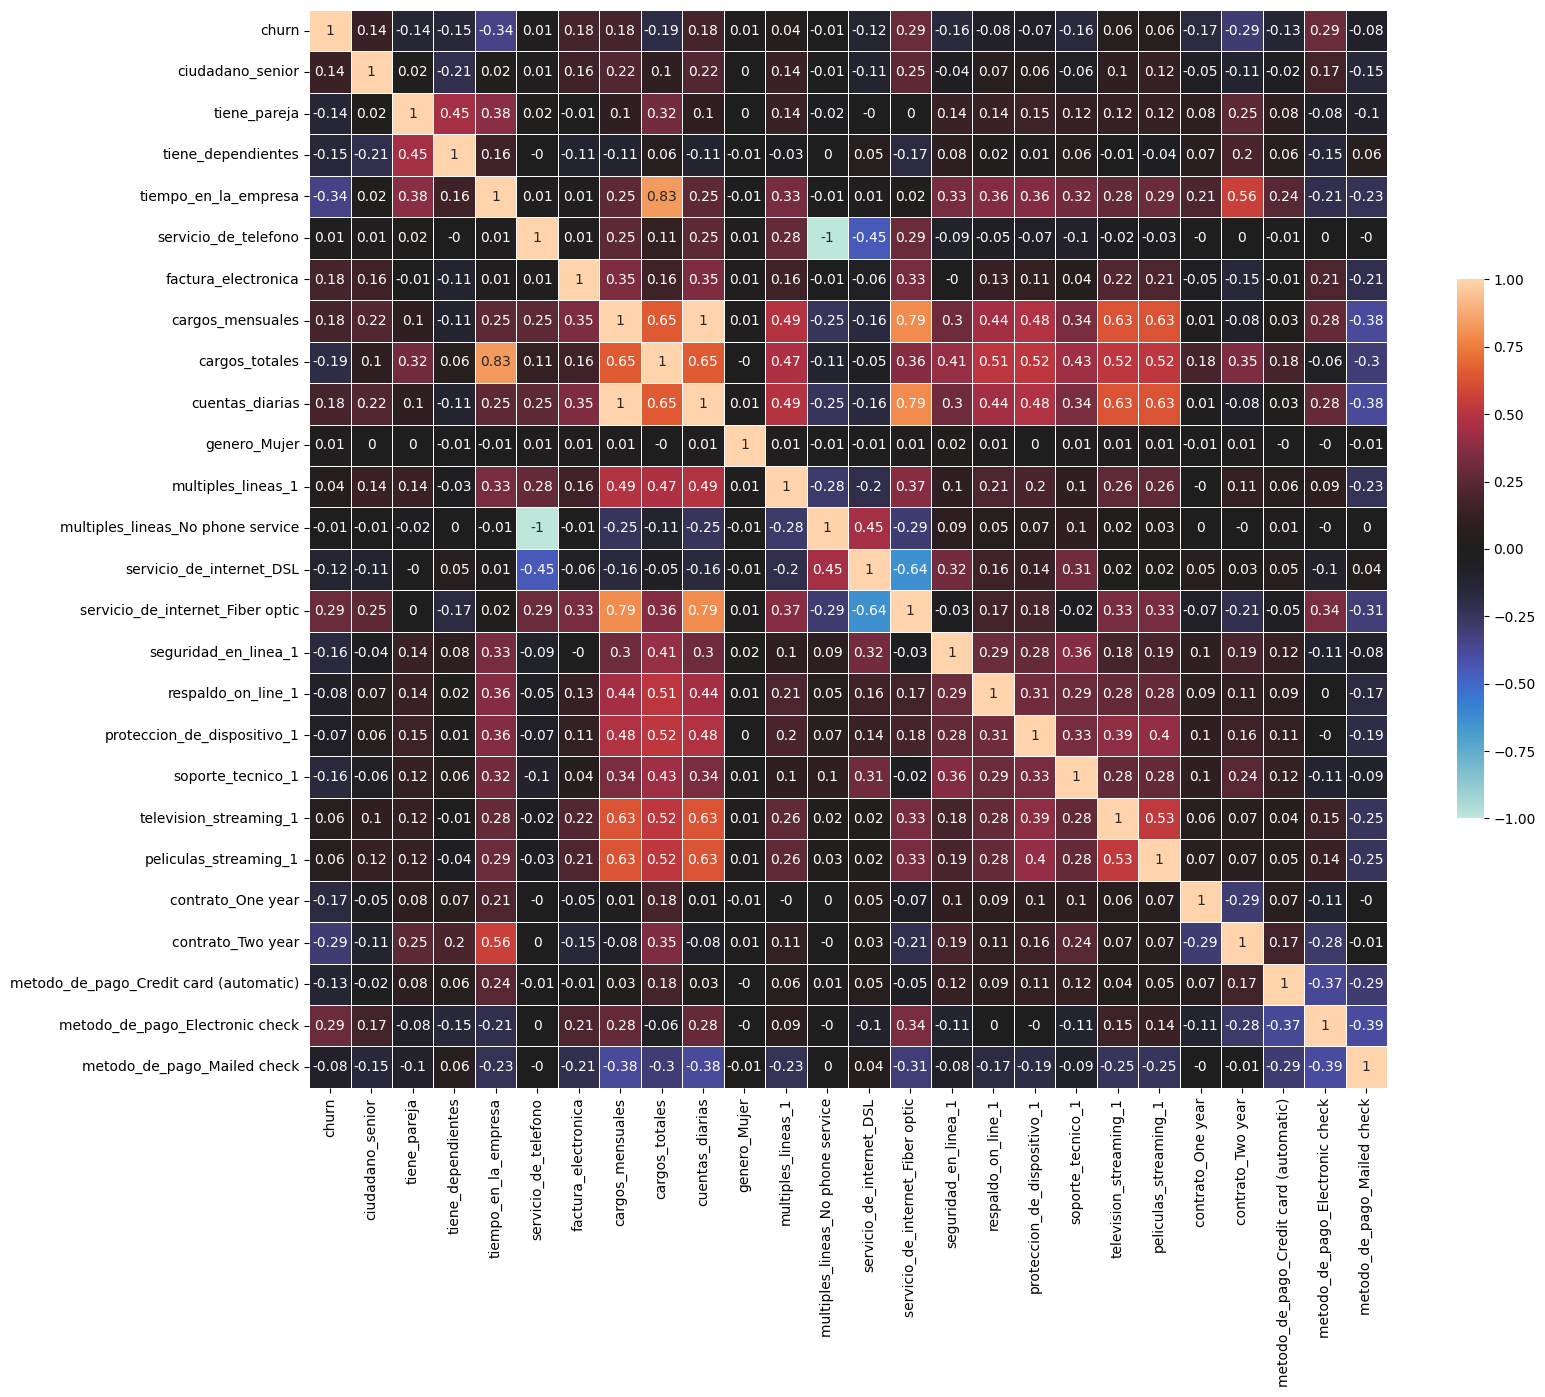

In [199]:
fig, ax = plt.subplots(figsize=(18,14))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

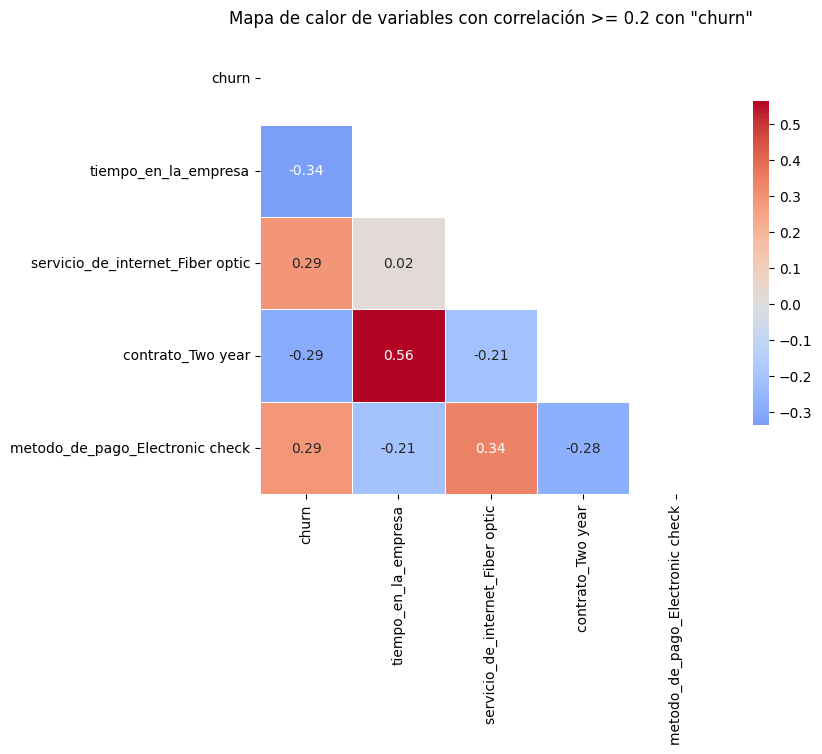

In [200]:
var_objetivo = 'churn'

limite = 0.2

variables_relevantes = corr.index[abs(corr[var_objetivo]) >= limite].tolist()

if var_objetivo not in variables_relevantes:
    variables_relevantes.append(var_objetivo)

corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Mapa de calor de variables con correlación >= {limite} con "{var_objetivo}"')
plt.show()


## 🔍 Análisis de Multicolinealidad

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [227]:
X = df_encoded.drop(columns=['churn'])

In [233]:
X_const = add_constant(X)

In [235]:
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [236]:
display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
7,cargos_mensuales,inf
5,servicio_de_telefono,inf
9,cuentas_diarias,inf
12,multiples_lineas_No phone service,inf
14,servicio_de_internet_Fiber optic,595.382484
13,servicio_de_internet_DSL,139.150107
20,peliculas_streaming_1,24.249121
19,television_streaming_1,24.146092
8,cargos_totales,10.832700
4,tiempo_en_la_empresa,7.580478


In [237]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_filtered = X_const.copy()

cols_to_drop = [
    'cargos_mensuales',
    'servicio_de_telefono',
    'cuentas_diarias',
    'multiples_lineas_No phone service',
    'servicio_de_internet_Fiber optic',
    'servicio_de_internet_DSL',
    'peliculas_streaming_1',
    'television_streaming_1'
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

X_filtered = X_filtered.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,12.639240
6,cargos_totales,6.085703
4,tiempo_en_la_empresa,5.616678
14,contrato_Two year,2.423233
16,metodo_de_pago_Electronic check,1.932520
17,metodo_de_pago_Mailed check,1.794485
15,metodo_de_pago_Credit card (automatic),1.562079
13,contrato_One year,1.542388
2,tiene_pareja,1.455932
11,proteccion_de_dispositivo_1,1.453545


## Modelos predictivos

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [239]:
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [241]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [242]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

## Regresión logística

In [243]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7225539733578319
ROC AUC: 0.812182608052041
Matriz de Confusión:
 [[1102  447]
 [ 157  471]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      1549
           1       0.51      0.75      0.61       628

    accuracy                           0.72      2177
   macro avg       0.69      0.73      0.70      2177
weighted avg       0.77      0.72      0.73      2177



## Random Forest

In [244]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7487367937528709
ROC AUC: 0.7767025572282096
Matriz de Confusión:
 [[1256  293]
 [ 254  374]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.56      0.60      0.58       628

    accuracy                           0.75      2177
   macro avg       0.70      0.70      0.70      2177
weighted avg       0.75      0.75      0.75      2177



## Comparación de los dos modelos

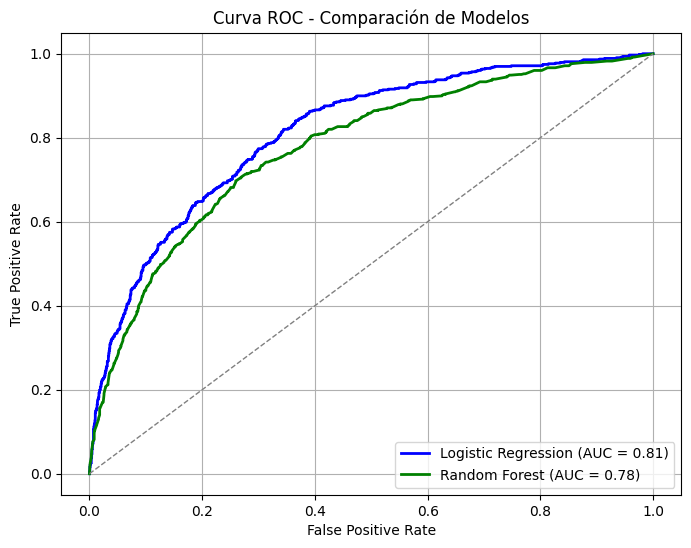

In [247]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # línea de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Comparación de Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()